# Find Correlations Between Variables Use Python
Dataset source: https://www.kaggle.com/danielgrijalvas/movies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('./Data/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


The dataset has:
* Numerical columns: Budget, Gross, Runtime, Score and Votes.
* Categorical columns: Company, Country, Director, Genre, Name, Rating, Star and Writer.
* Date columns: Released and Year.

### Find if there is any missing data

In [3]:
#Find if there is any missing data
cols = df.columns
[print('{} - {}%'.format(col, np.mean(df[col].isnull()))) for col in cols];

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Print data types for each colum

In [4]:
#Data types for each colum
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Comment: The values in column "Budget" and "Gross" are "float" datatypes but there is no digits after the decimals.



In [5]:
#Change data Type of colums
df = df[df['budget'].notnull()]
df = df[df['gross'].notnull()]
df['budget']=df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

### The year has incorrect values when compare it with the released date column and company has duplicate values.

In [6]:
#Create correct year column
df['correct_year'] = df['released'].astype(str).str[:4]

In [7]:
#Drop duplicate values
df['company'].drop_duplicates();

### Check the outlier of column 'gross'

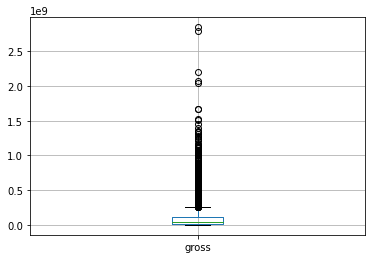

In [8]:
#Check outliers
df.boxplot(column='gross');

### Find out the amount of movies per each year

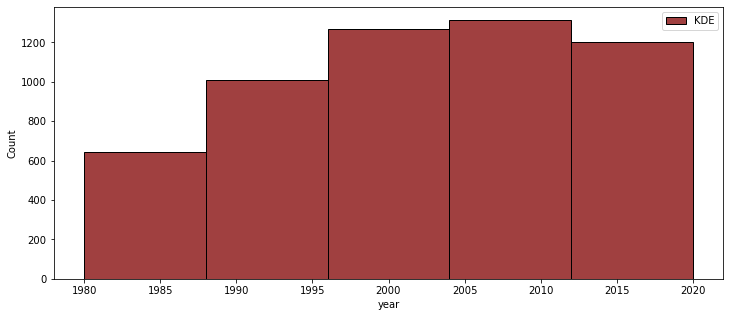

In [9]:
sns.histplot(df['year'], bins = 5, color = 'maroon', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

It seems there are the same amounts of movies studied per each year!

### Find correlations

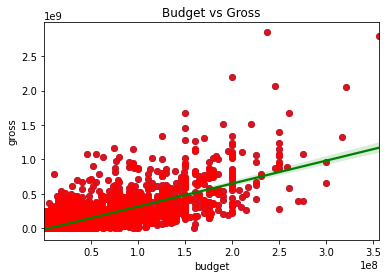

In [10]:
#Scatter plot & Regression plot: budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"},
           line_kws={"color":"green"});

Conclusion: Budget and Gross are positively correlated -> Low budget movies are likely to have poor profit.

### Compute and visualize pairwise correlation of columns, excluding NA/null values

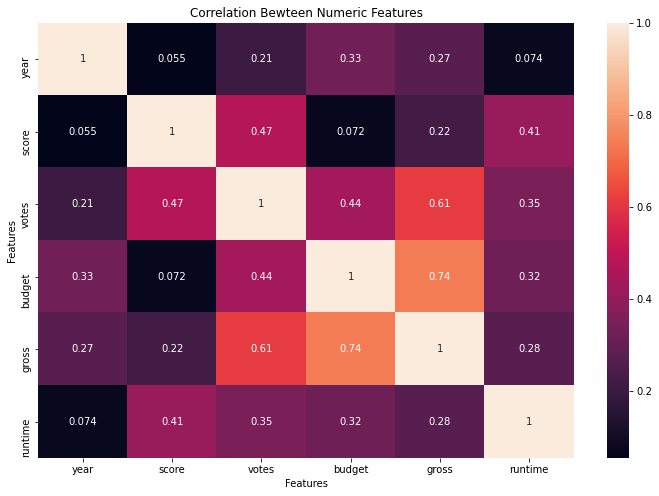

In [11]:
#Compute pairwise correlation of columns, excluding NA/null values
cor = df.corr() #Pearson correlation

#Plot the correlation
plt.figure(figsize = (12,8))
sns.heatmap(cor, annot=True)
plt.title('Correlation Bewteen Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features');

In [12]:
#Numerize column
new_df = df.copy()
def to_category(df, col_name):
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
    
[to_category(new_df, col_name) for col_name in new_df.columns];

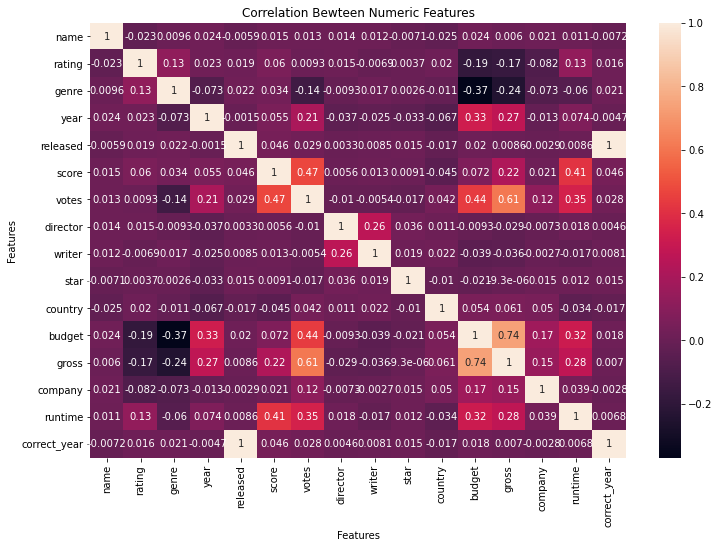

In [13]:
#Compute pairwise correlation of columns, excluding NA/null values
cor = new_df.corr() #Pearson correlation
#Plot the correlation
plt.figure(figsize = (12,8))
sns.heatmap(cor, annot=True)
plt.title('Correlation Bewteen Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features');


In [14]:
new_cor = new_df.corr() #calculate Pearson correlation
new_cor = new_cor.unstack()

In [15]:
new_cor = new_cor.sort_values(kind="quicksort")
high_cor = new_cor[new_cor>0.5]
high_cor

votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
released      correct_year    0.996190
correct_year  released        0.996190
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

Hypothesis: votes and budget have the high correlation to gross.

## EDA

### Find the total number of company in the dataset.

In [16]:
#How many companies are there ?
company = df.groupby('company').size()
print('There are {} companies.'.format(len(company)))

There are 1481 companies.


### Plot top 10 companies that has the most released movies

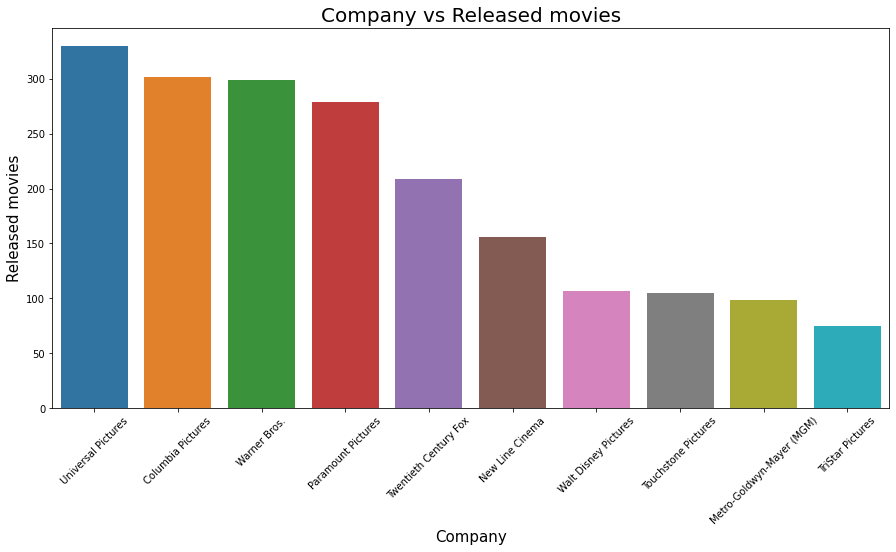

In [17]:
#Top 10 company that has the most released movies.
company = df['company'].value_counts()
company = pd.DataFrame(company).head(10)

sns.barplot(x = company.index, y = company['company'])

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs Released movies', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

*Comment: The companies have a large number of released movies seem to be famous companies with many blockbusters.*

### Plot top 10 companies by gross revenue

In [18]:
# Top 10 companies by gross revenue
df.groupby('company')[["gross"]].sum()

,gross
company,
"""DIA"" Productions GmbH & Co. KG",44350926
"""Weathering With You"" Film Partners",193457467
.406 Production,10580
1492 Pictures,217256250
1818 Productions,12232628
...,...
erbp,587174
i am OTHER,17986781
i5 Films,10031529


No handles with labels found to put in legend.


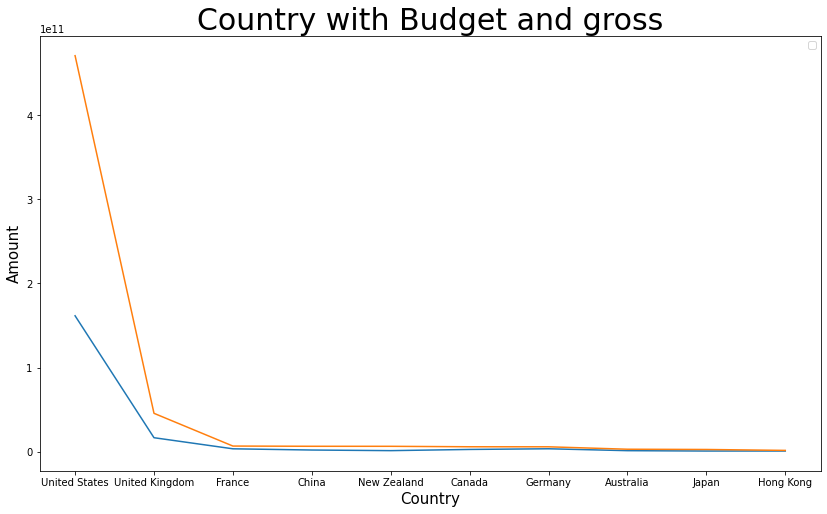

In [19]:
#Countries vs Budget and Gross
bgcountry=df.groupby(['country'])['budget','gross'].sum().sort_values(by=['gross'],ascending=False)
bgcountry.reset_index(inplace=True)
top10bgcountry = bgcountry.head(10)
top10bgcountry.reset_index(inplace=True)
plt.figure(figsize = (14,8))
plt.plot(top10bgcountry['country'],top10bgcountry['budget'],top10bgcountry['country'],top10bgcountry['gross'])
plt.title("Country with Budget and gross",size=30)
plt.xlabel("Country",size=15)
plt.ylabel("Amount",size=15)
plt.legend()
plt.show()

*Conclusion: United States has the highest budget and gross among all countries.*

### Plot top 10 countries with the most released films

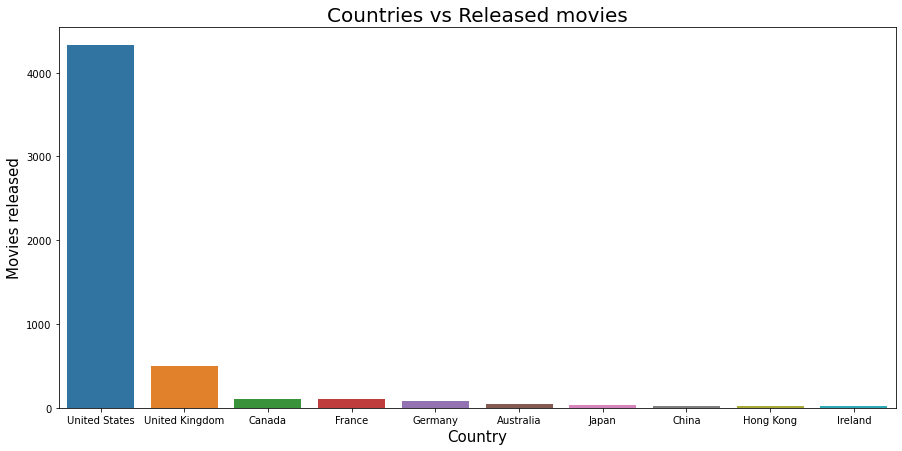

In [20]:
# Top 10 countries with the most released films
country_data = list(df['country'].unique())

Countries = pd.DataFrame(df['country'].value_counts())
Countries
Ten_countries = pd.DataFrame(df['country'].value_counts()).head(10)

sns.barplot(x = Ten_countries.index, y = Ten_countries['country'])

labels =Ten_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs Released movies', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15);

### Find the popular genre of movies

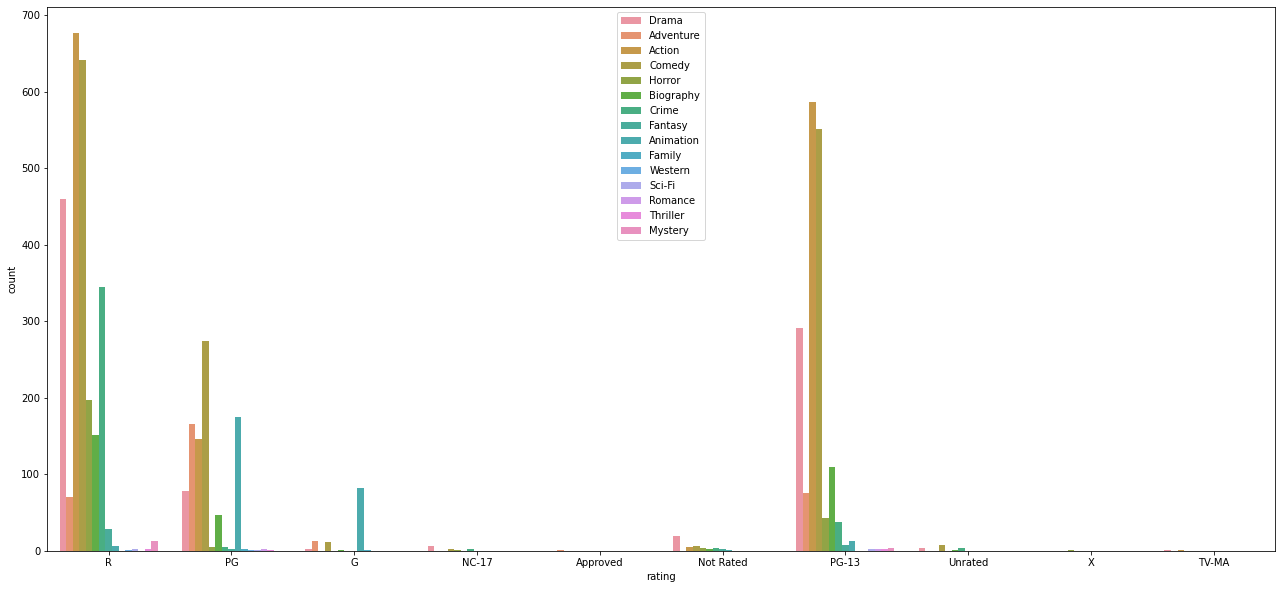

In [21]:
#Find the popular genre of movies
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating',data = df ,hue='genre')
plt.legend(loc='upper center')
plt.show()

*Conclusion: It can seen that most of the movies are from Adventure, Action and Comedy genres.*

### Plot the most popular genre

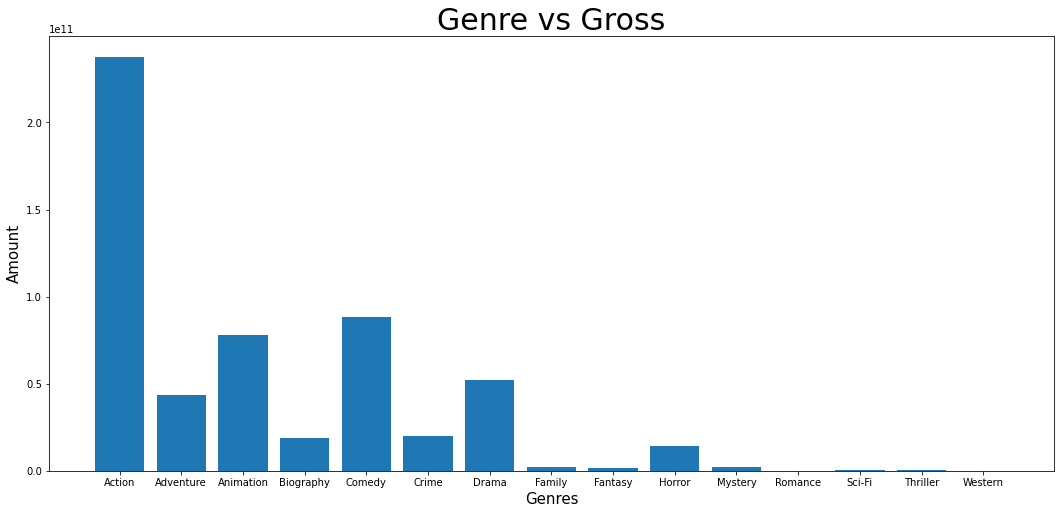

In [23]:
#Genres vs Gross
genre_gross=df.groupby(['genre'])['gross'].sum()
genre_gross=genre_gross.to_frame()
genre_gross.reset_index(inplace=True)

fig = plt.figure(figsize=(18,8))
plt.bar(genre_gross['genre'],genre_gross['gross'])
plt.title("Genre vs Gross",size=30)
plt.xlabel("Genres",size=15)
plt.ylabel("Amount",size=15)
plt.show()

*Conclusion: Genre Action seems to be the most popular genre since it has the highest gross.*